In [1]:
###########################################################
#.                        Chapter 5                       #
###########################################################

In [2]:
import re

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'],
        columns = ds['feature_names'])
    code_species_map = dict(zip(
        range(3), ds['target_names']))
    df['species'] = [code_species_map[c]
        for c in ds['target']]
    return df
df = get_iris_df()

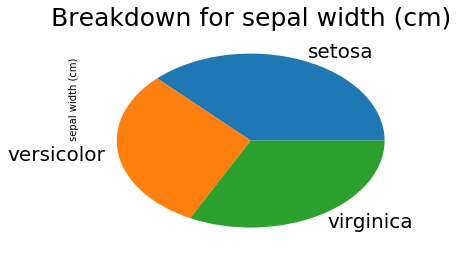

In [6]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Breakdown for ' + var, fontsize=25)
plt.savefig('iris_pie_for_one_variable.jpg')
plt.show()

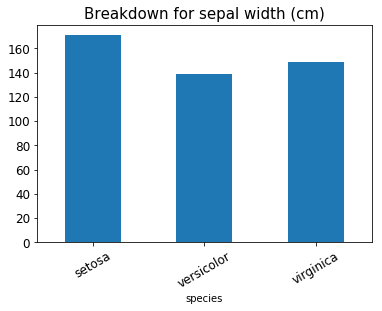

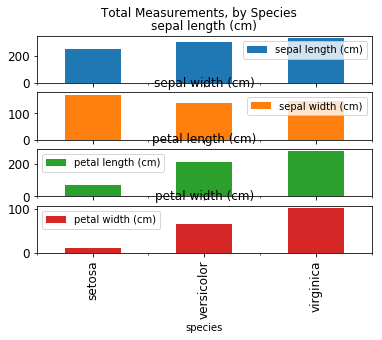

In [9]:
#5.4

sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=12,
rot=30)
plt.title('Breakdown for ' + var, fontsize=15)
plt.savefig('iris_bar_for_one_variable.jpg')
plt.show()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
    kind='bar', subplots=True, fontsize=12)
plt.suptitle('Total Measurements, by Species')

plt.show()
plt.close()

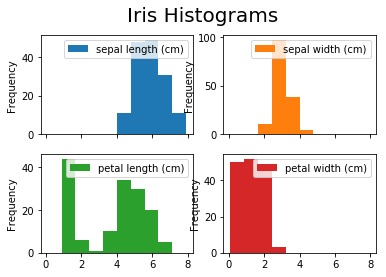

In [10]:
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

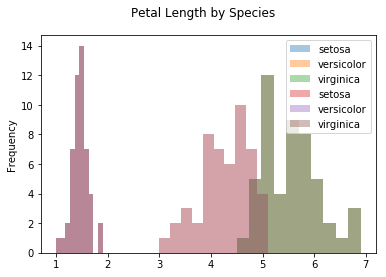

In [12]:
for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    forspec['petal length (cm)'].plot(
     kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Petal Length by Species')
plt.savefig('iris_hist_by_spec.jpg')
plt.show()

In [13]:
#5.6
col = df['petal length (cm)']
Average = col.mean()
Std = col.std()
Median = col.quantile(0.5)
Percentile25 = col.quantile(0.25)
Percentile75 = col.quantile(0.75)
col = df['petal length (cm)']
Perc25 = col.quantile(0.25)
Perc75 = col.quantile(0.75)
Clean_Avg = col[(col>Perc25)&(col<Perc75)].mean()

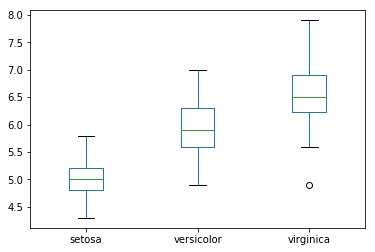

In [15]:
#5.7
col = "sepal length (cm)"
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.show()

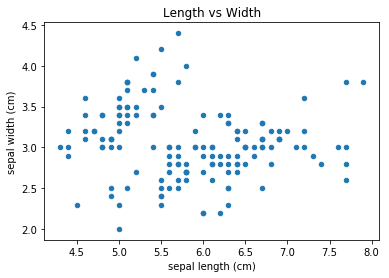

In [16]:
#5.8
df.plot(kind="scatter",
    x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.show()

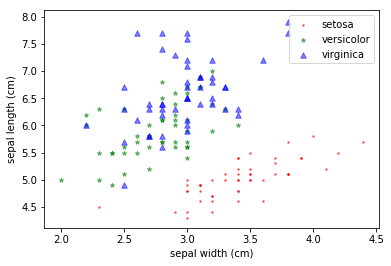

In [18]:
plt.close()
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
    ddf = df[df['species']==spec]
    ddf.plot(kind="scatter",
     x="sepal width (cm)", y="sepal length (cm)",
     alpha=0.5, s=10*(i+1), ax=ax,
     color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

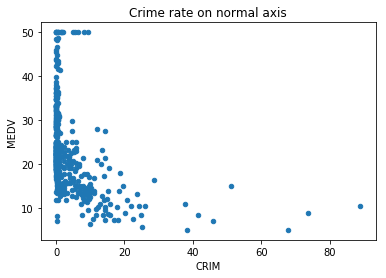

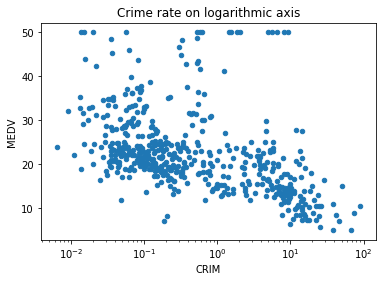

In [20]:
#5.9
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
# Make Pandas dataframe
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target
# Normal Scatterplot
df.plot(x='CRIM',y='MEDV',kind='scatter')
plt.title("Crime rate on normal axis")
plt.show()
df.plot(x='CRIM',y='MEDV',kind='scatter',logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()

/Users/palwindersingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


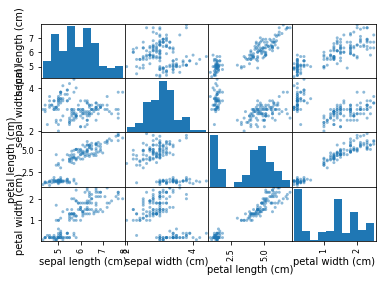

In [25]:
#5.10
plt.close()
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

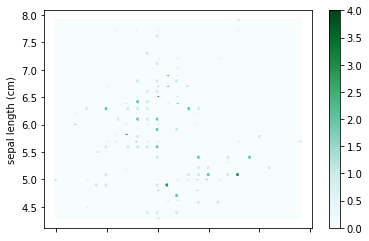

In [28]:
#5.11
plt.close()
df.plot(kind="hexbin",
x="sepal width (cm)", y="sepal length (cm)")
plt.show()

In [29]:
#5.12
df["sepal width (cm)"].corr(
df["sepal length (cm)"])

-0.10936924995064937

In [30]:
df["sepal width (cm)"].corr(
df["sepal length (cm)"], method="pearson")

-0.10936924995064937

In [31]:
df["sepal width (cm)"].corr(
df["sepal length (cm)"], method="spearman")

-0.15945651848582867

In [33]:
df["sepal width (cm)"].corr(
df["sepal length (cm)"], method="spearman")

-0.15945651848582867

/Users/palwindersingh/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


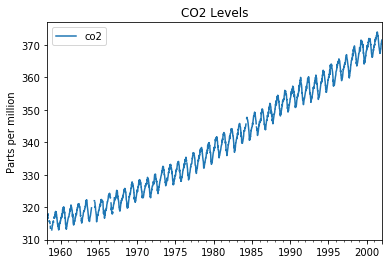

In [34]:
#5.13
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()

In [35]:
import urllib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Get raw CSV data from the web
URL = ("http://ichart.finance.yahoo.com/" +
"table.csv?s=GOOG&c=2000")
dat = urllib.urlopen(URL).read()
open('foo.csv','w').write(dat)
# Make DataFrame, w timestamp as the index
df = pd.read_csv('foo.csv')
df.index = df['Date'].astype('datetime64')
df['LogClose'] = np.log(df['Close'])
df['Close'].plot()
plt.title("Normal Axis")
plt.show()
df['Close'].plot(logy=True)
plt.title("Logarithmic Axis")
plt.show()

#We Dont have foo file

AttributeError: module 'urllib' has no attribute 'urlopen'